In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostClassifier
from sklearn import svm
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import pickle

In [6]:
selected_features = pd.read_csv('selected_features.csv')

## Split Dataset and Fit to Models

In [7]:
#Define features and targets
X = selected_features.drop(columns='price')
y = selected_features['price']

In [8]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

## Model Fitting

A variety of models will be fit and evaluated with MSE and R2 scores to determine the best fitting model. After model selection, cross grid search will be utilized to tune hyperparameters.

The models that will be used are:

•Linear Regression

•Lasso Regression

•ElasticNet Regression

•Gradient Boosting Regressor

•Ada Boost Classifier

•Support Vector Machine

### Linear Regression

In [20]:
#Instantiate the model
linear = LinearRegression()

#Fit data to the model
linear.fit(X_train, y_train)

#Predict and evaluate
linear_y_pred = linear.predict(X_test)
mse_linear = mean_squared_error(y_test, linear_y_pred).round(4)
r2_linear = round(r2_score(y_test, linear_y_pred), 4)

#Print the metrics
print("Linear -- Mean Squared Error:", mse_linear)
print("Linear -- R2 Score:", r2_linear)

Linear -- Mean Squared Error: 4093202223.5091
Linear -- R2 Score: 0.2484


### Lasso Regression

In [18]:
#Instantiate the model
lasso = Lasso(max_iter=5000)

#Fit data to the model
lasso.fit(X_train, y_train)

#Predict and evaluate
lasso_y_pred = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, lasso_y_pred).round(4)
r2_lasso = round(r2_score(y_test, lasso_y_pred), 4)

#Print the metrics
print("Lasso -- Mean Squared Error:", mse_lasso)
print("Lasso -- R2 Score:", r2_lasso)

Lasso -- Mean Squared Error: 4093467331.3946
Lasso -- R2 Score: 0.2484


### Elastic Net Regression

In [22]:
#Instantiate the model
elastic = ElasticNet()

#Fit data to the model
elastic.fit(X_train, y_train)

#Predict and evaluate
elastic_y_pred = elastic.predict(X_test)
mse_elastic = mean_squared_error(y_test, elastic_y_pred).round(4)
r2_elastic = round(r2_score(y_test, elastic_y_pred), 4)

#Print the metrics
print("Elastic Net -- Mean Squared Error:", mse_elastic)
print("Elastic Net -- R2 Score:", r2_elastic)

Elastic Net -- Mean Squared Error: 4568223394.3242
Elastic Net -- R2 Score: 0.1612


### Gradient Boosting Regressor

In [23]:
#Instantiate the model
GBR = GradientBoostingRegressor()

#Fit data to the model
GBR.fit(X_train, y_train)

#Predict and evaluate
gbr_y_pred = GBR.predict(X_test)
mse_gbr = mean_squared_error(y_test, gbr_y_pred).round(4)
r2_gbr = round(r2_score(y_test, gbr_y_pred), 4)

#Evaluate the metrics
print("GBR -- Mean Squared Error:", mse_gbr)
print("GBR -- R2 Score:", r2_gbr)

GBR -- Mean Squared Error: 3009677972.0386
GBR -- R2 Score: 0.4474


### Ada Boost Classifier

In [25]:
#Instantiate the model
ada = AdaBoostClassifier(algorithm = 'SAMME', random_state=42)

#Fit data to the model
ada.fit(X_train, y_train)

#Predict and evaluate
ada_y_pred = ada.predict(X_test)
mse_ada = mean_squared_error(y_test, ada_y_pred).round(4)
r2_ada = round(r2_score(y_test, ada_y_pred), 4)

#Evaluate the metrics
print("Ada -- Mean Squared Error:", mse_ada)
print("Ada -- R2 Score:", r2_ada)

Ada -- Mean Squared Error: 5080655570.4103
Ada -- R2 Score: 0.0671


### Support Vector Machine

In [26]:
#Instantiate the model
svm = svm.SVC()

#fit data to the model
svm.fit(X_train, y_train)

#Predict and evaluate
svm_y_pred = svm.predict(X_test)
mse_svm = mean_squared_error(y_test, svm_y_pred).round(4)
r2_svm = round(r2_score(y_test, svm_y_pred), 4)

#Print the results
print("SVM -- Mean Squared Error:", mse_svm)
print("SVM -- R2 Score:", r2_svm)

SVM -- Mean Squared Error: 6014036865.2621
SVM -- R2 Score: -0.1043


## Visualize the results

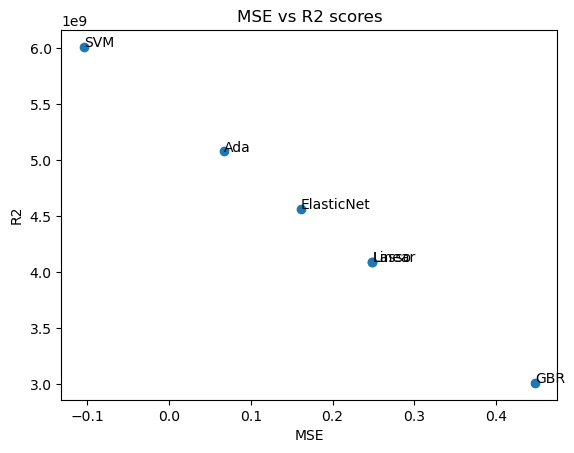

In [33]:
mse_scores = [mse_linear, mse_lasso, mse_elastic, mse_gbr, mse_ada, mse_svm]
r2_scores = [r2_linear, r2_lasso, r2_elastic, r2_gbr, r2_ada, r2_svm]
labels = ["Linear", "Lasso", "ElasticNet", "GBR", "Ada", "SVM"]

figsize=(12,6)
plt.scatter(r2_scores, mse_scores)
#Add labels
for i in range(len(mse_scores)):
    plt.text(r2_scores[i], mse_scores[i], labels[i])

plt.title("MSE vs R2 scores")
plt.xlabel("MSE")
plt.ylabel("R2")
plt.show()

## Hyperparameter Tuning

In [59]:
#Define dictionary with possible hyperparameters:
params = {
    'learning_rate': [0.1, 1, 3],
    'n_estimators': [50, 100, 250],
    'max_depth': [1, 3, 10],
    'ccp_alpha': [0, 0.5, 1]}

#Perform GridSearch
grid_search = GridSearchCV(
    estimator = GBR,
    param_grid = params,
    scoring = 'neg_mean_squared_error',
    n_jobs = -1, 
    cv = 5,
    verbose = 1)

grid_search.fit(X_train, y_train)

print("Best paramaters:", grid_search.best_params_)
print("Best MSE score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
    

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best paramaters: {'ccp_alpha': 1, 'learning_rate': 1, 'max_depth': 3, 'n_estimators': 50}
Best MSE score: -3691289561.56316


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:1113: RuntimeWarning: overflow encountered in square
  (array - array_means[:, np.newaxis]) ** 2, axis=1, weights=weights


In [62]:
#Further fine-tuning
new_params = {
    'learning_rate': [.7, 1, 1.5],
    'n_estimators': [25, 50, 75],
    'max_depth': [2, 3, 5],
    'ccp_alpha': [1, 1.5, 3]}

#Perform GridSearch
new_grid_search = GridSearchCV(
    estimator = GBR,
    param_grid = new_params,
    scoring = "neg_mean_squared_error",
    n_jobs = -1,
    cv = 5,
    verbose = 1)

new_grid_search.fit(X_train, y_train)

print("Best paramaters:", new_grid_search.best_params_)
print("Best MSE score:", new_grid_search.best_score_)

best_model = new_grid_search.best_estimator_

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best paramaters: {'ccp_alpha': 3, 'learning_rate': 1, 'max_depth': 3, 'n_estimators': 25}
Best MSE score: -3692701549.234646


In [64]:
#Update the hyperparameters for the model
hyperparameters = {
    'learning_rate': 1,
    'max_depth': 3,
    'n_estimators': 25,
    'ccp_alpha': 3}

GBR.set_params(**hyperparameters)

#Fit the model to the training data
GBR.fit(X_train, y_train)

GradientBoostingRegressor(ccp_alpha=3, learning_rate=1, n_estimators=25)

In [65]:
#Make predictions with the model
train_preds = GBR.predict(X_train)
test_preds = GBR.predict(X_test)

## Predictions vs. Actuals Visualization

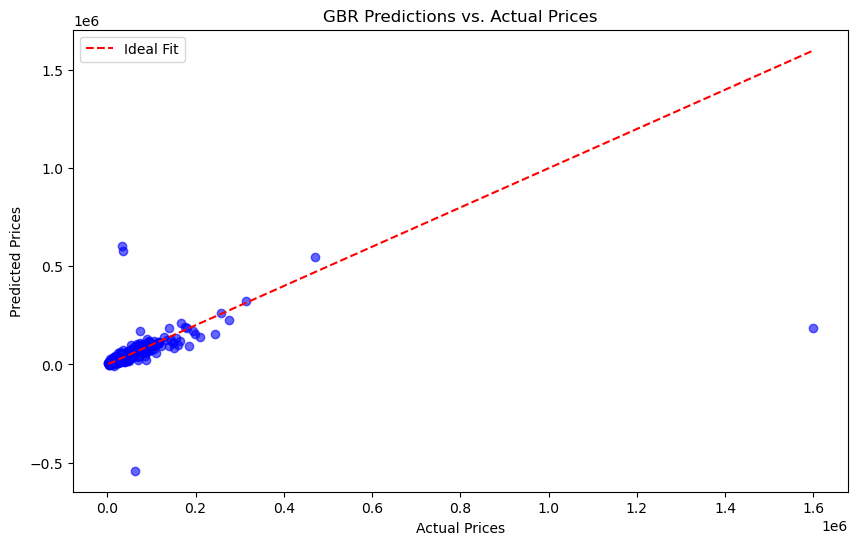

In [70]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, test_preds, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('GBR Predictions vs. Actual Prices')
plt.legend()
plt.show()

A vast majority of the data points fall near the idea fit line (with a few noticeable outliers). It appears that the model is working well.

## Final Statistical Analysis of the Model

### RMSE, R2, and Accuracy

In [83]:
predictions = GBR.predict(X_test)

In [86]:
#RMSE
rmse = root_mean_squared_error(y_test, predictions)
print(f"RMSE: {rmse:.4f}")

#R2 score
r2 = r2_score(y_test, predictions)
print(f"R2 Score: {r2:.4f}")

#Accuracy
threshold = .1 #10% tolerance
accuracy = ((abs(y_test - predictions) / y_test) <= threshold).mean() * 100
print(f"Model Accuracy (within {threshold * 100}% of actual prices: {accuracy:.2f}%")

threshold2 = .15 #15% tolerance
accuracy2 = ((abs(y_test - predictions) / y_test) <= threshold2).mean() * 100
print(f"Model Accuracy (within {threshold2 * 100}% of actual prices: {accuracy2:.2f}%")

RMSE: 69790.9561
R2 Score: 0.1056
Model Accuracy (within 10.0% of actual prices: 25.12%
Model Accuracy (within 15.0% of actual prices: 36.51%


The model accurately predicted the price of cat within 10% of its actual price 25% of the time and within 15% of the price 36% of the time.

Kelly Blue Book and Edmunds aim at 10-15% accuracy, so this model performs well generally.

## Export the model

In [73]:
with open('prediction_model', 'wb') as f:
    pickle.dump(GBR, f)